# CH5 Logistic Regression

直接使用Pandas的DataFrame还是很简单的

In [1]:
import numpy as np
import pandas as pd

import progressbar
import logging
progressbar.streams.wrap_stdout()
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - [line:%(lineno)d] - %(levelname)s: %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S')

import warnings
warnings.filterwarnings("ignore")


In [2]:
logging.info("test")

2018-05-17 01:29:23 - [line:1] - INFO: test


In [3]:
df = pd.read_csv("./Data/testSet.txt",sep="\t",header=None)
df.head(2)

,0,1,2
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1


In [4]:
def loadDataSet():
    dataMat = [];labelMat = []
    with open("./Data/testSet.txt") as fr:
        for line in fr.readlines():
            lineArr = line.strip().split()
            dataMat.append([1, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
    return dataMat, labelMat    

## Sigmoid 函数

这个函数有个推导，[李航,2012,P78]

In [5]:
def sigmoid(inX):
    return 1/(1 + np.exp(-inX))

## 最佳回归系数确定

### 梯度上升

In [6]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMatrix = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
#     print(m,n)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in list(range(maxCycles)):
        h = sigmoid(dataMatrix*weights)
#         print(np.shape(h))
        error = (labelMatrix - h)
        # return array
#         weights += alpha*dataMatrix.transpose()*error
        # return matrix
        weights = weights + alpha*dataMatrix.transpose()*error
    return weights

In [7]:
dataArr,labelMat = loadDataSet()

In [8]:
wei = gradAscent(dataArr,labelMat)

In [9]:
#

绘制决策边界

In [10]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    weights = wei if type(wei).__name__ == 'ndarray' else wei.getA()
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
#     print(dataArr)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]);ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c="red",marker="s")
    ax.scatter(xcord2,ycord2,s=30,c="green")
    x = np.arange(-3.0, 3.0, 0.1)
#   sigmoid = 0,从图像看 0是分类的分界点
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel("X1");plt.ylabel("X2")
    plt.show()

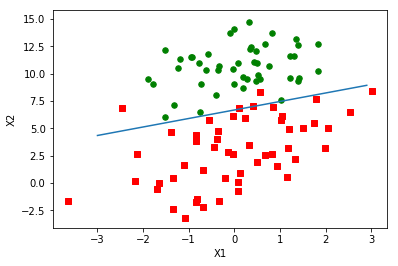

In [11]:
plotBestFit(wei)

### 随机梯度上升

In [12]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
#         print(np.shape(h))
        error = classLabels[i] - h
        weights = weights + alpha*error*dataMatrix[i]
    return weights

In [13]:
dataArr,labelMat = loadDataSet()
wei = stocGradAscent0(np.array(dataArr),labelMat)
wei

array([ 1.01702007,  0.85914348, -0.36579921])

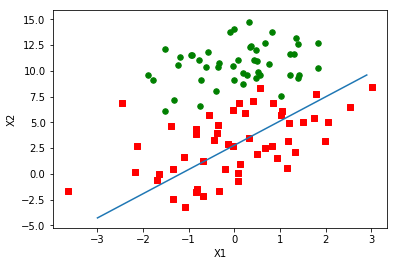

In [14]:
plotBestFit(wei)

In [15]:
def stocGradAscent(dataMatrix, classLabels,numIter = 150):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for x in range(numIter):
        for i in range(m):
            h = sigmoid(sum(dataMatrix[i]*weights))
    #         print(np.shape(h))
            error = classLabels[i] - h
            weights = weights + alpha*error*dataMatrix[i]
            if x == 0 and i == 0:
                result = weights
            else:
                result = np.vstack([result,weights])
    return weights,result

#### 迭代过程

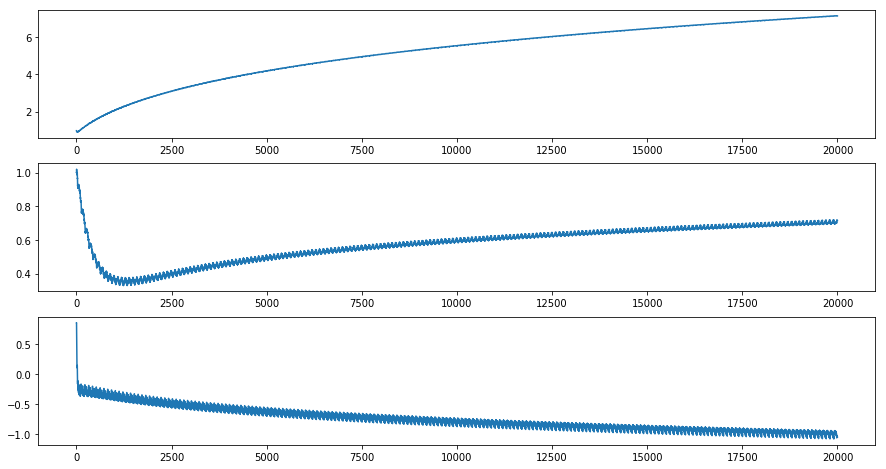

In [16]:
wei,result = stocGradAscent(np.array(dataArr),labelMat,numIter = 200)

x0 = result.transpose()[0]
x1 = result.transpose()[1]
x2 = result.transpose()[2]
y = np.arange(0, len(x0), 1)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.subplot(311)
plt.plot(y,x0)
plt.subplot(312)
plt.plot(y,x1)
plt.subplot(313)
plt.plot(y,x2)
plt.show()

抖动是来自样本之间的差异，数据集并非线性可分

#### 改进

In [17]:
def stocGradAscent1(dataMatrix, classLabels,numIter = 150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for i in progressbar.progressbar(range(numIter)):
#         print("Iterations %d" % i)
        dataIndex = list(range(m))
        for j in range(m):
            alpha = 4/(1 + j + i) + 0.01
            randIndex = int(np.random.uniform(0,len(dataIndex)))            
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha*error*dataMatrix[randIndex]
            del(dataIndex[randIndex])
            if i == 0 and j == 0:
                result = weights
            else:
                result = np.vstack([result,weights])
    return weights,result

100% (40 of 40) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


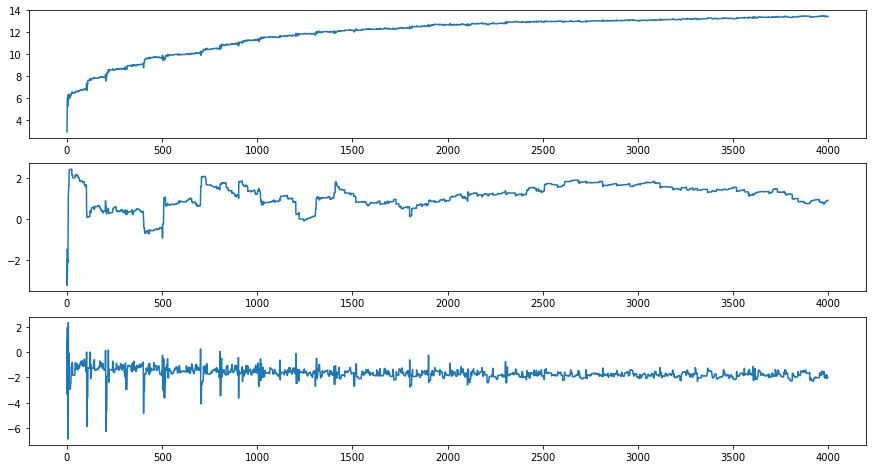

In [18]:
wei,result = stocGradAscent1(np.array(dataArr),labelMat,numIter = 40)

x0 = result.transpose()[0]
x1 = result.transpose()[1]
x2 = result.transpose()[2]
y = np.arange(0,len(x0), 1)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.subplot(311)
plt.plot(y,x0)
plt.subplot(312)
plt.plot(y,x1)
plt.subplot(313)
plt.plot(y,x2)
plt.show()

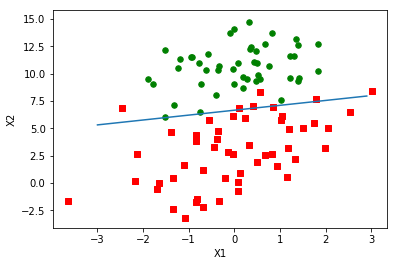

In [19]:
plotBestFit(wei)

## 病马死亡率

### by np

In [20]:
def classifyVector(inX,weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1
    else: return 0

In [21]:
def colicTest():
    frTrain = open("./Data/horseColicTraining.txt")
    frTest = open("./Data/horseColicTest.txt")
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split("\t")
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))

    trainWeights, results = stocGradAscent1(np.array(trainingSet),trainingLabels,numIter = 50)
    errorCount = 0; numTestVec = 0
    for line in frTest.readlines():
        numTestVec += 1
        currLine = line.strip().split("\t")
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr),trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = errorCount/numTestVec
    logging.info("the error rate of this test is: %f" , errorRate)
    return errorRate

In [22]:
def multiTest():
    numTests = 5; errorSum=0
    for k in range(numTests):
        errorSum +=colicTest()
    logging.info("after %d iterations the average error rate is: %f", numTests, errorSum/numTests)

In [23]:
logging.info("")

2018-05-17 01:29:27 - [line:1] - INFO: 


In [24]:
multiTest()

100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:29:37 - [line:24] - INFO: the error rate of this test is: 0.388060
100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:29:47 - [line:24] - INFO: the error rate of this test is: 0.477612
100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:29:58 - [line:24] - INFO: the error rate of this test is: 0.611940
100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:30:08 - [line:24] - INFO: the error rate of this test is: 0.358209
100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:30:19 - [line:24] - INFO: the error rate of this test is: 0.388060
2018-05-17 01:30:19 - [line:5] - INFO: after 5 iterations the average error rate is: 0.444776


### by pd

In [25]:
import pandas as pd

In [26]:
train_df = pd.read_table("./Data/horseColicTraining.txt",header=None)
test_df = pd.read_table("./Data/horseColicTest.txt",header=None)

In [27]:
train_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0,0.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0,0.0


In [28]:
test_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,1,38.5,54,20,0,1,2,2,3,...,2,2,5.9,0,2,42.0,6.3,0,0.0,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0,0.0,0,0,44.0,6.3,1,5.0,1


In [29]:
def colicTest_df():
    train_df = pd.read_table("./Data/horseColicTraining.txt",header=None)
    test_df = pd.read_table("./Data/horseColicTest.txt",header=None)
    trainingSet = train_df[list(range(21))].values
    trainingLabels = train_df[[21]].values
    trainWeights, results = stocGradAscent1(trainingSet,trainingLabels,numIter = 50)
    errorCount = 0; numTestVec = 0
    testSet = test_df[list(range(21))].values
    testLabels = test_df[[21]].values.reshape(-1)
    errorRate = sum(sigmoid(sum((testSet*trainWeights).T)).astype("int32") != testLabels)/len(testLabels)
    logging.info("the error rate of this test is: %f" , errorRate)
    return errorRate

In [30]:
colicTest_df()

100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:30:30 - [line:11] - INFO: the error rate of this test is: 0.417910


0.417910447761194

In [31]:
def multiTest_df():
    numTests = 5; errorSum=0
    for k in range(numTests):
        errorSum +=colicTest_df()
    logging.info("after %d iterations the average error rate is: %f", numTests, errorSum/numTests)

In [32]:
multiTest_df()

100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:30:40 - [line:11] - INFO: the error rate of this test is: 0.582090
100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:30:51 - [line:11] - INFO: the error rate of this test is: 0.402985
100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:31:01 - [line:11] - INFO: the error rate of this test is: 0.343284
100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:31:12 - [line:11] - INFO: the error rate of this test is: 0.417910
100% (50 of 50) |########################| Elapsed Time: 0:00:10 Time:  0:00:10
2018-05-17 01:31:23 - [line:11] - INFO: the error rate of this test is: 0.507463
2018-05-17 01:31:23 - [line:5] - INFO: after 5 iterations the average error rate is: 0.450746
